## CREDIT SCORING SYSTEM USING A MACHINE LEARNING APPROACH
### Arnold Somuah Asante

.

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

from collections import Counter


%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import joblib

from sklearn.exceptions import ConvergenceWarning
import warnings


In [2]:
te_df = pd.read_csv('test.csv')
ta_df = pd.read_csv('train.csv')

In [3]:
ta_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [4]:
ta_df.shape

(100000, 28)

In [5]:
te_df.shape

(50000, 27)

In [6]:
te_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


## Intepretation of the Data

- ID: Unique Identification of the record
- Customer_ID: Unique Identification of the customer
- Month: Month of the paticular year
- Name: The name of the person
- Age: The age of the person
- SSN: Social Security Number of the person
- Occupation: The occupation of the person
- Annual_Income: The Annual Income of the person (Income per Year)
- Monthly_Inland_Salary: Monthly in-hand salary of the person (-taxes and squad)
- Num_Bank_Accounts: The number of bank accounts of the person
- Num_Credit_Card: Number of credit cards the person has
- Interest_Rate: The interest rate on the credit card of the person
- Num_of_Loan: The number of loans taken by the person from the bank
- Type_of_Loan: The types of loans taken by the person from the bank
- Delay_from_due_date: The average number of days delayed by the person from the date of payment
- Num_of_Delayed_Payment: Number of payments delayed by the person
- Changed_Credit_Card: The percentage change in the credit card limit of the person
- Num_Credit_Inquiries: The number of credit card inquiries by the person
- Credit_Mix: Classification of Credit Mix of the customer
- Outstanding_Debt: The outstanding balance of the person
- Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
- Credit_History_Age: The age of the credit history of the person
- Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
- Total_EMI_per_month: The total EMI per month of the person
- Amount_invested_monthly: The monthly amount invested by the person
- Payment_Behaviour: The payment behaviour of the person
- Monthly_Balance: The monthly balance left in the account of the person
- Credit_Score: The credit score of the person


<AxesSubplot:>

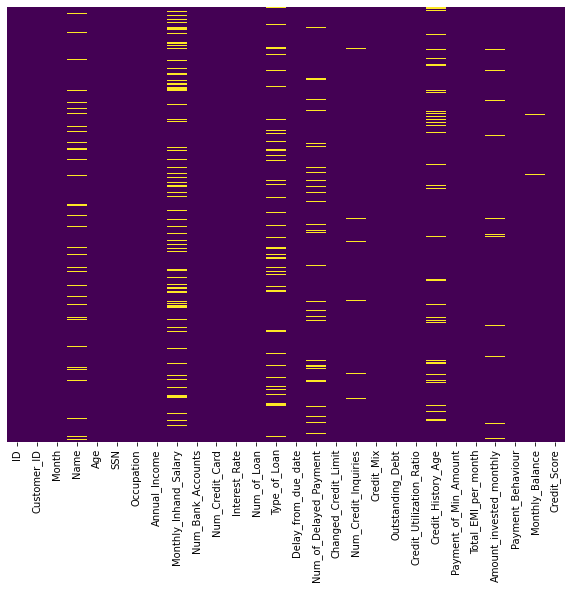

In [7]:
plt.figure(figsize = (10,8))
sb.heatmap(ta_df.isnull(),yticklabels=False, cbar= False, cmap = 'viridis')

In [8]:
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
dta_df = ta_df.drop(d_col , axis=1).copy()
dta_df



,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [9]:
dta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  object 
 1   Occupation              100000 non-null  object 
 2   Annual_Income           100000 non-null  object 
 3   Delay_from_due_date     100000 non-null  int64  
 4   Num_of_Delayed_Payment  92998 non-null   object 
 5   Outstanding_Debt        100000 non-null  object 
 6   Credit_History_Age      90970 non-null   object 
 7   Payment_of_Min_Amount   100000 non-null  object 
 8   Total_EMI_per_month     100000 non-null  float64
 9   Payment_Behaviour       100000 non-null  object 
 10  Monthly_Balance         98800 non-null   object 
 11  Credit_Score            100000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.2+ MB


In [10]:
# Checking for the number of missing value
dta_df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

In [11]:
#checking for the number of duplicate rows in a Pandas DataFrame 
dta_df.duplicated().sum()

0

In [12]:
drop_na = dta_df.dropna().copy()

In [13]:
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
5,23,Scientist,19114.12,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,3,8_,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,_______,34847.84,3,4,605.03,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84_,3,-1,605.03,26 Years and 9 Months,No,18.816215,High_spent_Large_value_payments,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3_,605.03,26 Years and 10 Months,No,18.816215,Low_spent_Medium_value_payments,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26 Years and 11 Months,No,18.816215,Low_spent_Small_value_payments,444.8670318506144,Good


In [14]:
#Creating a function for cleaning and standardizing data that has inconsistent formatting.

def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)
print(filter_general)

<function filter_general at 0x7fc20c7e23a0>


In [15]:
# Creating a function for cleaning and standardizing data that has inconsistent formatting but particularly for 
# the delayed payment data.

def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)


In [16]:
# ta_df.drop(['Age'], axis =1 ,inplace = True)
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [17]:
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in col_int:
  for c in sym:
    drop_na[i] = drop_na[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_na[i] = drop_na[i].replace(c,'')
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84,3,-1,605.03,26 Years and 9 Months,No,18.816214573128885,High_spent_Large_value_payments,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3,605.03,26 Years and 10 Months,No,18.816214573128885,Low_spent_Medium_value_payments,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26 Years and 11 Months,No,18.816214573128885,Low_spent_Small_value_payments,444.8670318506144,Good
13,28,Teacher,34847.84,3,0,605.03,27 Years and 0 Months,No,18.816214573128885,High_spent_Large_value_payments,481.505261949182,Good
14,28,Teacher,34847.84,3,4,605.03,27 Years and 1 Months,NM,18.816214573128885,High_spent_Medium_value_payments,464.8806778859809,Good


In [18]:
drop_na.describe().T

,count,unique,top,freq
Age,71843,1303,26,2160
Occupation,71843,15,Lawyer,5068
Annual_Income,71843,13187,40341.16,13
Delay_from_due_date,71843,73,15,2619
Num_of_Delayed_Payment,71843,569,19,4215
Outstanding_Debt,71843,12203,1151.7,22
Credit_History_Age,71843,404,15 Years and 10 Months,365
Payment_of_Min_Amount,71843,3,Yes,37515
Total_EMI_per_month,71843,14023,0.0,7622
Payment_Behaviour,71843,6,Low_spent_Small_value_payments,19363


In [19]:
# ta_df["Changed_Credit_Limit"]=ta_df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
# ta_df.drop(ta_df[ta_df["Changed_Credit_Limit"]=="_"].index,inplace=True)
# ta_df["Changed_Credit_Limit"]=ta_df["Changed_Credit_Limit"].astype("float")

#Transform the information to the value
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')

In [20]:
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,2,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,1,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,1,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,6,484.5912142650067,Good
10,28,Teacher,34847.84,3,-1,605.03,26.9,No,18.816214573128885,6,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3,605.03,26.10,No,18.816214573128885,2,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26.11,No,18.816214573128885,1,444.8670318506144,Good
13,28,Teacher,34847.84,3,0,605.03,27.0,No,18.816214573128885,6,481.505261949182,Good
14,28,Teacher,34847.84,3,4,605.03,27.1,NM,18.816214573128885,5,464.8806778859809,Good


In [21]:
drop_na['Num_of_Delayed_Payment'] = drop_na['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
drop_na['Num_of_Delayed_Payment'] = drop_na['Num_of_Delayed_Payment'].astype(np.float64)

In [22]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [23]:
# Transform the target data to numerical
drop_na['Credit_Score'] = drop_na['Credit_Score'].replace({'Good': 3, 'Standard': 2, 'Poor': 1})
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.10,No,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.30,No,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.40,No,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.70,No,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.80,No,18.816215,6.0,484.591214,3
10,28.0,Teacher,34847.84,3.0,-1.0,605.03,26.90,No,18.816215,6.0,466.466476,2
11,28.0,Teacher,34847.84,3.0,3.0,605.03,26.10,No,18.816215,2.0,465.676224,3
12,28.0,Teacher,34847.84,3.0,1.0,605.03,26.11,No,18.816215,1.0,444.867032,3
13,28.0,Teacher,34847.84,3.0,0.0,605.03,27.00,No,18.816215,6.0,481.505262,3
14,28.0,Teacher,34847.84,3.0,4.0,605.03,27.10,NM,18.816215,5.0,464.880678,3


In [24]:
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].replace({'NM': 0, 'Yes': 1, 'No': 2})
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


In [25]:
drop_na['Payment_Behaviour'].unique()

array([4., 2., 1., 6., 5., 3.])

In [26]:
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [27]:
drop_na.head(15)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.10,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.30,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.40,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.70,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.80,2,18.816215,6.0,484.591214,3
10,28.0,Teacher,34847.84,3.0,-1.0,605.03,26.90,2,18.816215,6.0,466.466476,2
11,28.0,Teacher,34847.84,3.0,3.0,605.03,26.10,2,18.816215,2.0,465.676224,3
12,28.0,Teacher,34847.84,3.0,1.0,605.03,26.11,2,18.816215,1.0,444.867032,3
13,28.0,Teacher,34847.84,3.0,0.0,605.03,27.00,2,18.816215,6.0,481.505262,3
14,28.0,Teacher,34847.84,3.0,4.0,605.03,27.10,0,18.816215,5.0,464.880678,3


In [28]:
df_clean = drop_na

In [29]:
df_clean.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,71843.000000,7.184300e+04,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,71843.000000,7.184300e+04,71843.000000
mean,110.772212,1.751183e+05,21.041201,31.190443,1422.212792,18.389782,1.238047,1400.981096,3.272720,-3.247823e+22,1.887449
std,685.332013,1.430392e+06,14.867880,228.220729,1151.139555,8.289498,0.648968,8279.352134,1.845655,3.290163e+24,0.675195
min,-500.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.930790e+04,10.000000,9.000000,565.995000,12.100000,1.000000,30.116962,1.000000,2.698337e+02,1.000000
50%,33.000000,3.696676e+04,18.000000,14.000000,1163.400000,18.200000,1.000000,68.348799,3.000000,3.364063e+02,2.000000
75%,42.000000,7.230590e+04,28.000000,18.000000,1941.540000,25.100000,2.000000,156.468001,5.000000,4.708997e+02,2.000000
max,8698.000000,2.419806e+07,67.000000,4397.000000,4998.070000,33.800000,2.000000,82331.000000,6.000000,1.602041e+03,3.000000


In [30]:
# Drop outlier by IQR calculation
Q1 = df_clean.Annual_Income.quantile(0.25)
Q3 = df_clean.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean.drop(df_clean.loc[df_clean['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_clean = df_clean.drop(df_clean.loc[df_clean['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_clean

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


<AxesSubplot:xlabel='Annual_Income'>

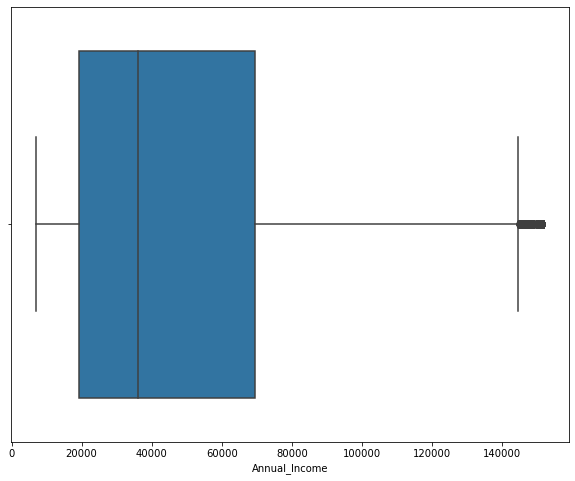

In [31]:
plt.figure(figsize=(10,8))
sb.boxplot(x= df_clean['Annual_Income'])

<AxesSubplot:xlabel='Outstanding_Debt'>

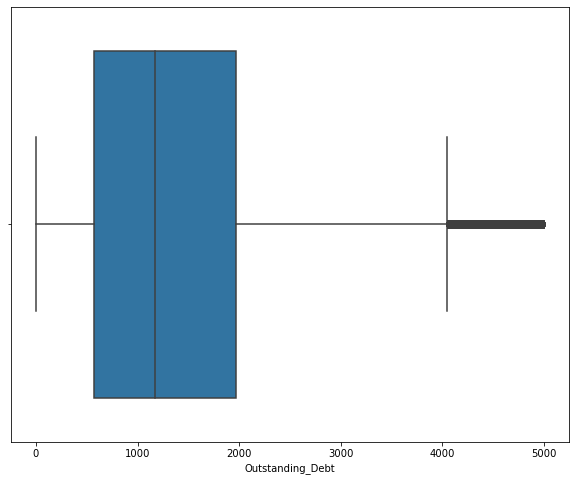

In [32]:
plt.figure(figsize=(10,8))
sb.boxplot(x=df_clean['Outstanding_Debt'])

In [33]:
occupation_count = df_clean['Occupation'].value_counts()
occupation_count

Lawyer           4912
Mechanic         4761
Teacher          4760
Engineer         4752
Architect        4735
Scientist        4722
Entrepreneur     4680
Developer        4659
Media_Manager    4651
Accountant       4647
Journalist       4614
Doctor           4580
Manager          4480
Musician         4473
Writer           4414
Name: Occupation, dtype: int64

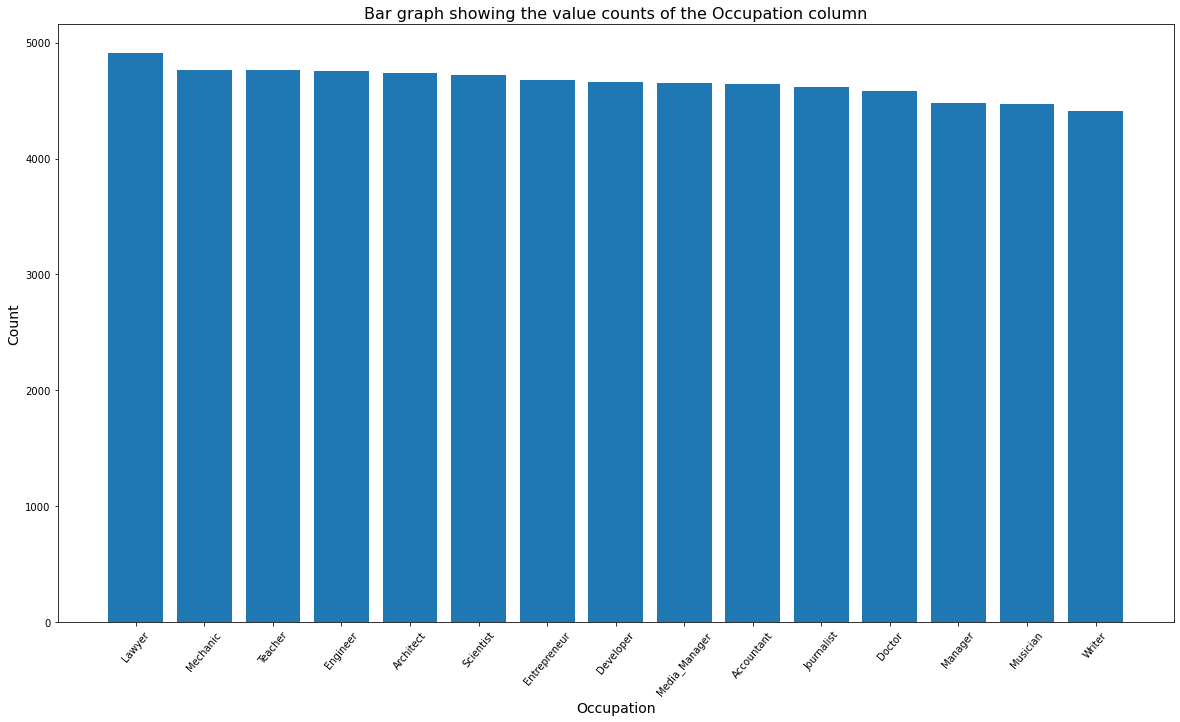

In [34]:
Occupation_counts = df_clean['Occupation'].value_counts()
fig = plt.figure(figsize= [20,11])
# create a bar chart of the occupation counts
plt.bar(Occupation_counts.index,Occupation_counts.values )

# set the title and axis labels
plt.title('Bar graph showing the value counts of the Occupation column', fontsize =16 )
plt.xlabel('Occupation',fontsize = 14)
plt.ylabel('Count', fontsize = 14 )

# rotate the x-axis labels to make them more readable
plt.xticks(rotation=50)

# display the histogram
plt.show()

In [35]:
def pie_plot(df_clean, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df_clean[col].value_counts().plot(ax=ax, kind='pie', figsize=(22, 15), fontsize=10, autopct='%1.1f%%')
        ax.set_title(str(col), fontsize = 12)
   
    

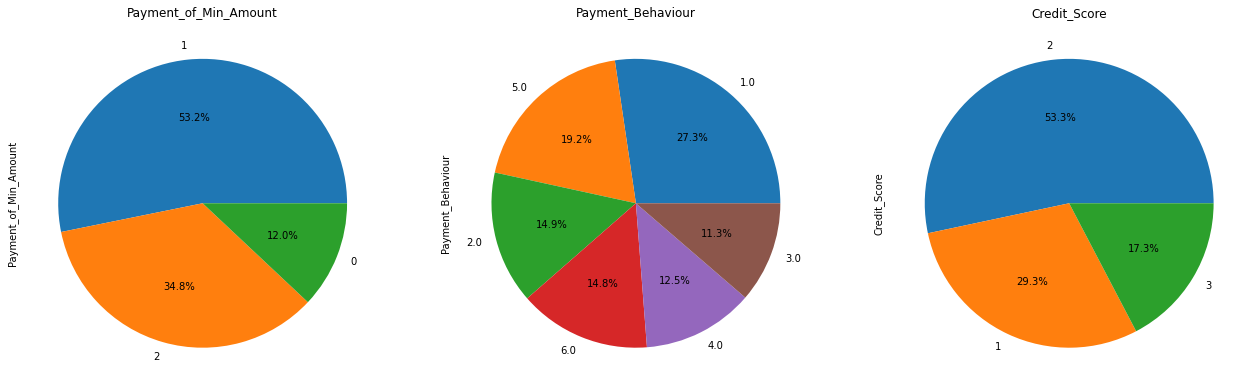

In [36]:
pie_plot(df_clean, [ 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 1,3)

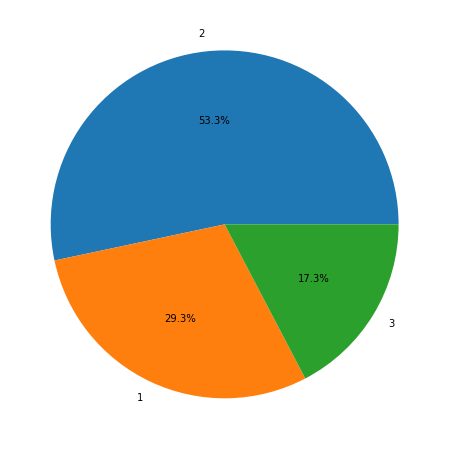

In [37]:
label = df_clean.Credit_Score.value_counts().index
plt.figure(figsize=(10,8))
label_count = df_clean.Credit_Score.value_counts().values
plt.pie(data=df_clean, x=label_count, labels=label, autopct='%1.1f%%', radius=1)
plt.show()

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

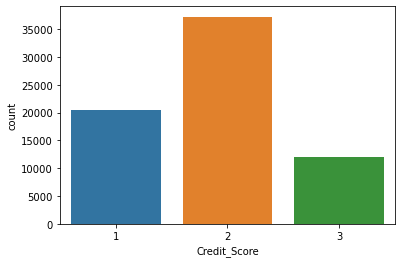

In [38]:
sb.countplot(x= 'Credit_Score', data = df_clean )

In [39]:
df_clean['Credit_Score'].value_counts()

2    37247
1    20493
3    12100
Name: Credit_Score, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>],
       [<AxesSubplot:title={'center':'Payment_of_Min_Amount'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Payment_Behaviour'}>],
       [<AxesSubplot:title={'center':'Monthly_Balance'}>,
        <AxesSubplot:title={'center':'Credit_Score'}>, <AxesSubplot:>]],
      dtype=object)

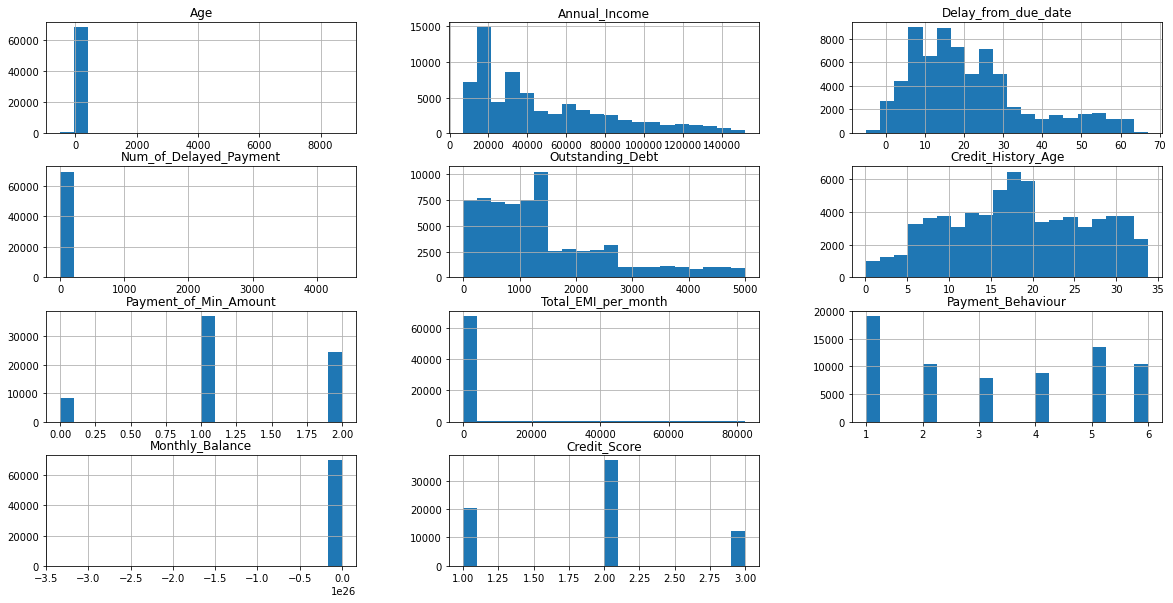

In [40]:
df_clean.hist(bins=20,figsize=[20,10])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

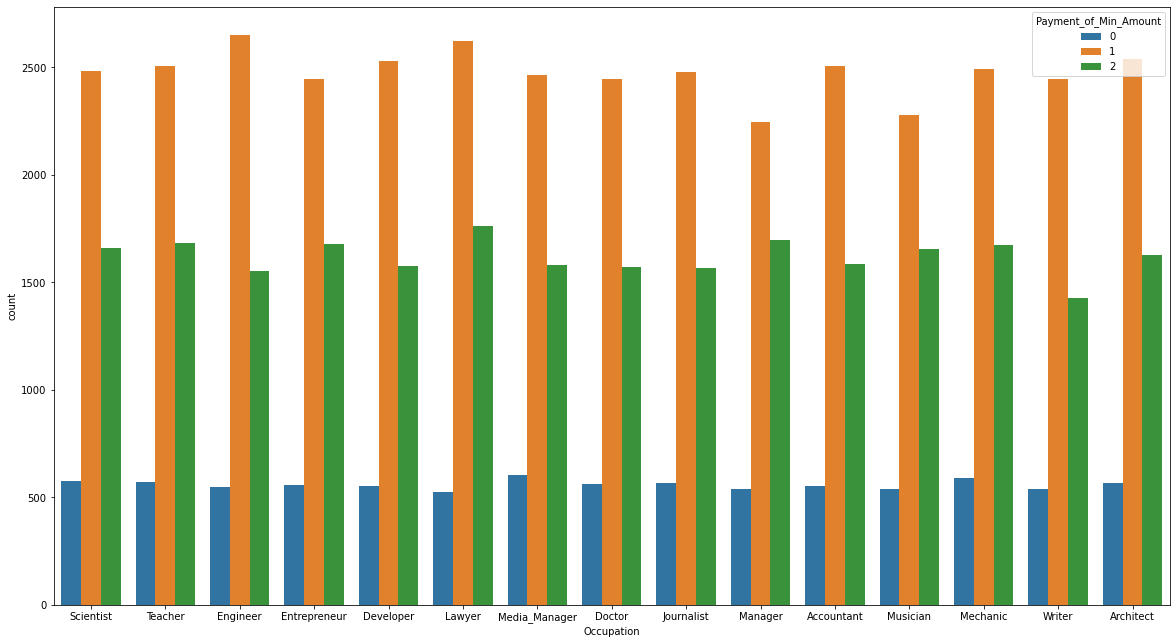

In [41]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=df_clean,x="Occupation",hue="Payment_of_Min_Amount")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

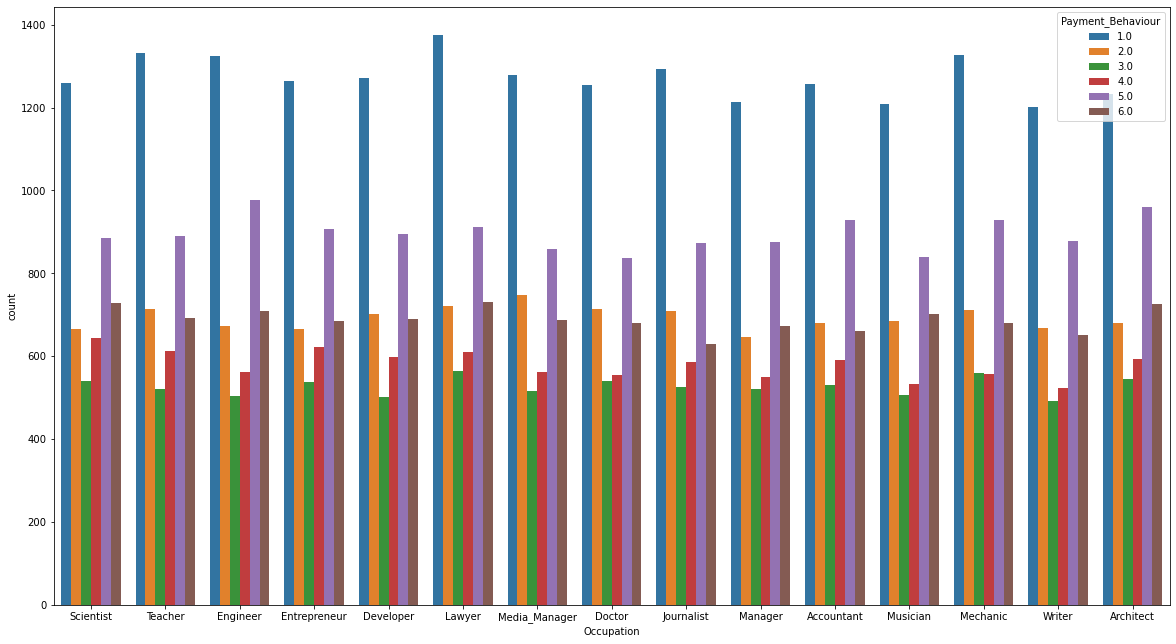

In [42]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=df_clean,x="Occupation",hue="Payment_Behaviour")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

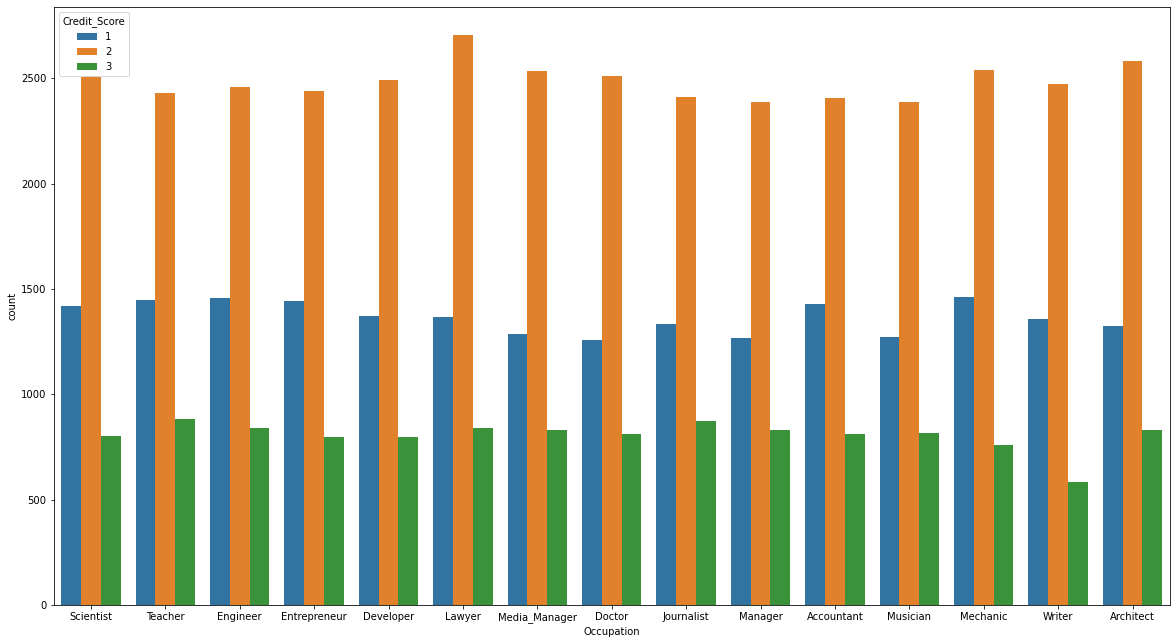

In [43]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=df_clean,x="Occupation",hue="Credit_Score")

<AxesSubplot:>

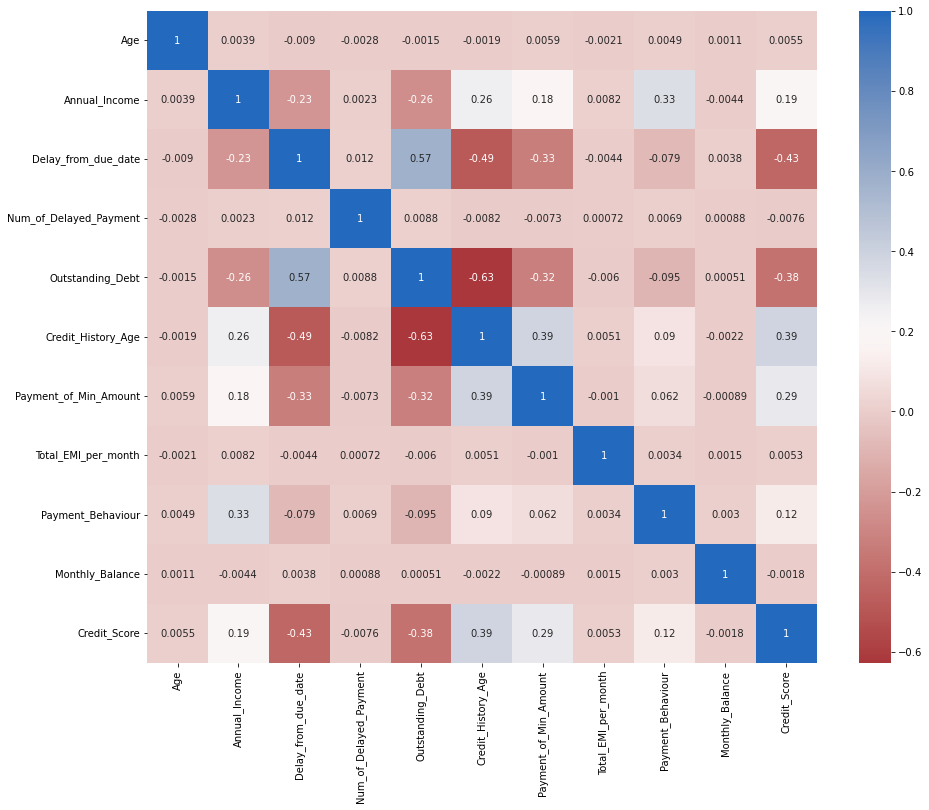

In [44]:
plt.figure(figsize= (15,12))
sb.heatmap(df_clean.corr(),annot=True ,cmap = 'vlag_r')

The dataset is not evenly distributed with respect to the occupation. A we can see that most of the

In [45]:
df_clean.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3


In [46]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_clean[col_float]:
  df_clean[i] = scaler.fit_transform(df_clean[[i]])
df_clean.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.056860,Scientist,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,3
2,0.000000,Scientist,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,3
3,0.056860,Scientist,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,3
6,0.056860,Scientist,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,3
9,0.057404,Teacher,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,3


In [47]:
df_clean = pd.get_dummies(df_clean, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_clean.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0.056860,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,0.056860,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,0.057404,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69840 entries, 0 to 99997
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       69840 non-null  float64
 1   Annual_Income             69840 non-null  float64
 2   Delay_from_due_date       69840 non-null  float64
 3   Num_of_Delayed_Payment    69840 non-null  float64
 4   Outstanding_Debt          69840 non-null  float64
 5   Credit_History_Age        69840 non-null  float64
 6   Payment_of_Min_Amount     69840 non-null  int64  
 7   Total_EMI_per_month       69840 non-null  float64
 8   Payment_Behaviour         69840 non-null  float64
 9   Monthly_Balance           69840 non-null  float64
 10  Credit_Score              69840 non-null  int64  
 11  Occupation_Accountant     69840 non-null  uint8  
 12  Occupation_Architect      69840 non-null  uint8  
 13  Occupation_Developer      69840 non-null  uint8  
 14  Occupa

In [49]:
df_clean.head(15)

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0.056860,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,0.056860,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,0.057404,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0
10,0.057404,0.192389,0.111111,0.000455,0.121012,0.795252,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0
11,0.057404,0.192389,0.111111,0.001364,0.121012,0.771513,2,0.000229,2.0,1.0,...,0,0,0,0,0,0,0,0,1,0
12,0.057404,0.192389,0.111111,0.000909,0.121012,0.771810,2,0.000229,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
13,0.057404,0.192389,0.111111,0.000682,0.121012,0.798220,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0
14,0.057404,0.192389,0.111111,0.001591,0.121012,0.801187,0,0.000229,5.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
feed = df_clean[[ 'Age','Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]


In [51]:
feed['Credit_Score'].count()

69840

In [52]:
X = feed.drop(['Credit_Score'],axis=1)

y = (feed['Credit_Score'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
lr = LogisticRegression(random_state=10)

In [55]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [56]:
# Evaluate the performance of the model on the test data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Data:", accuracy)


Accuracy on Test Data: 0.5817583046964491


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
# rf_cm = confusion_matrix(y_test,rf_y_pred)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
# print("confusion matrics=",rf_cm)
print("  ")
print("Accuracy on Test Feature",rf_accuracy)

  
Accuracy on Test Feature 0.770618556701031


In [58]:
#Define a Random Forest Classifier model with parallel processing and a fixed random state
clf_rf = RandomForestClassifier(random_state=10)

#Define a parameter grid to search for the best hyperparameters using Grid Search Cross-Validation
parametrs = {"n_estimators": [5, 10, 20, 30], 'max_depth': range(1, 10)}

#Create a GridSearchCV object with the defined model, parameter grid, and 5-fold cross-validation
clf_rf_grid = GridSearchCV(clf_rf, parametrs, cv=5)

#Fit the GridSearchCV object to the training data
clf_rf_grid.fit(X_train, y_train)
#Store the best estimator model found by the GridSearchCV object
rf_best = clf_rf_grid.best_estimator_
#Evaluate the accuracy of the best estimator model on the test data
accuracy = rf_best.score(X_test, y_test)
accuracy

0.6721792668957618

In [59]:

# Define the hyperparameter grid for decision tree
param_grid = {'max_depth': range(1, 11)}

# Create and fit the decision tree model with grid search cross-validation
dt = DecisionTreeClassifier(random_state=10)
dt_grid = GridSearchCV(dt, param_grid, cv=5)
dt_grid.fit(X_train, y_train)

# Retrieve the best estimator
dt_best = dt_grid.best_estimator_

# Evaluate the performance of the best estimator on the test data
y_pred = dt_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Estimator:", dt_best)
print("Accuracy on Test Data:", accuracy)



Best Estimator: DecisionTreeClassifier(max_depth=10, random_state=10)
Accuracy on Test Data: 0.6643757159221076


In [60]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
# print("confusion matrics=",cm)
# print("  ")
print("accuracy=",accuracy)

accuracy= 0.7014604810996563


In [61]:

# Create and fit the Naive Bayes Classifier model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Retrieve the best estimator (not applicable for Naive Bayes as it does not have hyperparameters)

# Evaluate the performance of the model on the test data
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Data:", accuracy)




Accuracy on Test Data: 0.5461053837342497


Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.39      0.47      4102
           2       0.59      0.80      0.68      7511
           3       0.50      0.22      0.31      2355

    accuracy                           0.58     13968
   macro avg       0.56      0.47      0.49     13968
weighted avg       0.57      0.58      0.55     13968



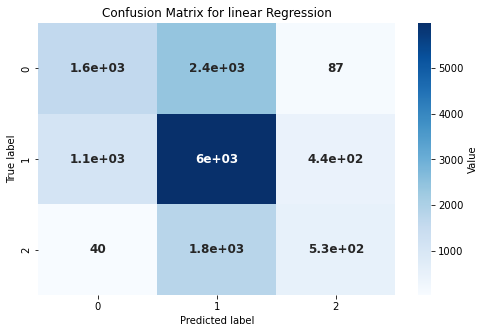

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the classes of the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy on Test Data:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



plt.figure(figsize = (8,5))
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ax = sb.heatmap(cm, annot=True, cmap="Blues",fmt='.2g', annot_kws={'fontsize':12, 'fontweight':'bold'}, cbar_kws={'label': 'Value'})

                                     
plt.title("Confusion Matrix for linear Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()




In [63]:


# # Evaluate the model on the test set
# y_pred = rf_best.predict(X_test)
# y_pred_proba = rf_best.predict_proba(X_test)

# # Print the classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Plot the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,8))
# sb.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix  for Random Forest Classifier")
# plt.show()




              precision    recall  f1-score   support

           1       0.59      0.66      0.62      4102
           2       0.68      0.43      0.53      7511
           3       0.36      0.71      0.48      2355

    accuracy                           0.55     13968
   macro avg       0.54      0.60      0.54     13968
weighted avg       0.60      0.55      0.55     13968



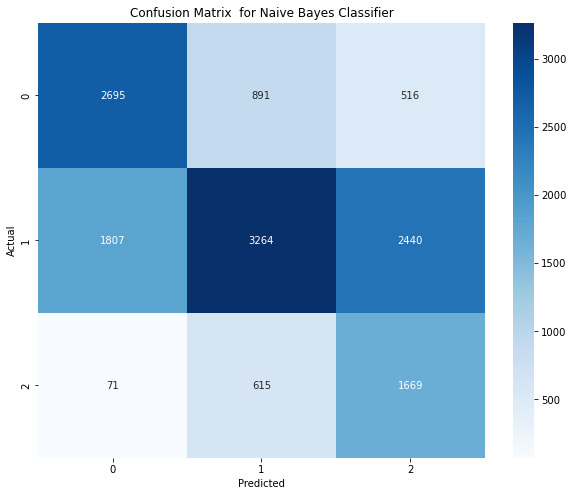

In [64]:
# Make predictions on test data
y_pred = gnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix  for Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

           1       0.77      0.78      0.78      4102
           2       0.78      0.80      0.79      7511
           3       0.72      0.64      0.68      2355

    accuracy                           0.77     13968
   macro avg       0.76      0.74      0.75     13968
weighted avg       0.77      0.77      0.77     13968



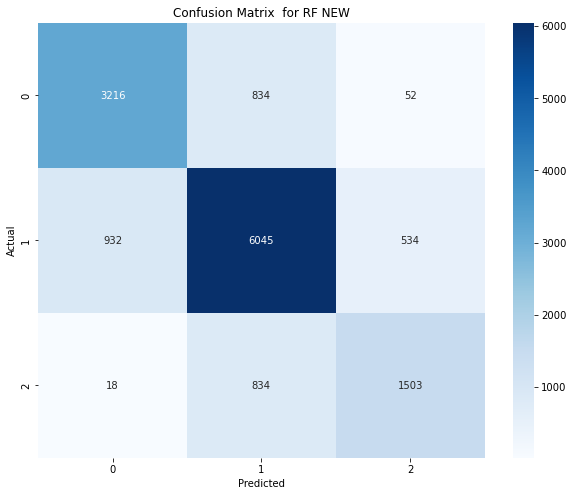

In [65]:
rf_y_pred = rf.predict(X_test)
# Print classification report
print(classification_report(y_test, rf_y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(10,8))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix  for RF NEW')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

           1       0.70      0.70      0.70      4102
           2       0.74      0.73      0.74      7511
           3       0.60      0.60      0.60      2355

    accuracy                           0.70     13968
   macro avg       0.68      0.68      0.68     13968
weighted avg       0.70      0.70      0.70     13968



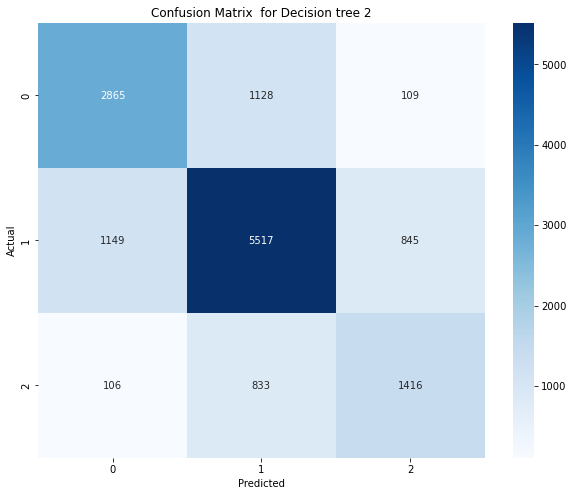

In [66]:
y_pred = dtree.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix  for Decision tree 2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
# # Make predictions on test data
# y_pred = dt_best.predict(X_test)

# # Print classification report
# print(classification_report(y_test, y_pred))

# # Create confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,8))
# # Create heatmap of confusion matrix
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix  for Decision Tree')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [68]:
import joblib



# Save the trained model to a file
joblib.dump(rf, 'credit_scoring_model.joblib')

['credit_scoring_model.joblib']

In [69]:
model = joblib.load('credit_scoring_model.joblib')


In [70]:

# Make predictions
#X_test = te_df.drop('Credit_Mix', axis=1)
# Convert categorical features to one-hot encoded features
#1X_test = pd.get_dummies(X_test)
#y5_test = te_df['Credit_Mix']

In [71]:
#y_uipred = model.predict(X_test)

In [72]:
#accuracy = accuracy_score(y_test, y_pred)
#accuracy


In [73]:
#precision = precision_score(y_test, y_pred)
#precision

In [74]:
#recall = recall_score(y_test, y_pred)
#recall

In [75]:
#f1 = f1_score(y_test, y_pred)
#f1

In [76]:
te_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [77]:
te_df = te_df.dropna().copy()

In [78]:
#Drop the column which is out of model scope
te_df_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_test = te_df.drop(te_df_col , axis=1).copy()
drop_test

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.574949,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.574949,High_spent_Medium_value_payments,361.44400385378196
4,28,_______,34847.84,3,1,605.03,27 Years and 3 Months,No,18.816215,High_spent_Large_value_payments,485.2984336755923
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816215,Low_spent_Large_value_payments,303.3550833433617
7,28,Teacher,34847.84,3,2_,605.03,27 Years and 6 Months,No,18.816215,!@9#%8,421.44796447960783
...,...,...,...,...,...,...,...,...,...,...,...
49992,29,Architect,20002.88,33,25,3571.7,6 Years and 4 Months,Yes,60.964772,Low_spent_Small_value_payments,314.8151526456419
49993,29,Architect,20002.88,33,25,3571.7,6 Years and 5 Months,Yes,60.964772,Low_spent_Small_value_payments,350.23147346441687
49994,29,_______,20002.88,33,22,3571.7,6 Years and 6 Months,Yes,60.964772,High_spent_Small_value_payments,341.179047488264
49997,25,Mechanic,39628.99,23,5,502.38,32 Years and 0 Months,No,35.104023,Low_spent_Large_value_payments,349.7263321025098


In [79]:
drop_test = drop_test[drop_test['Occupation'].str.contains('_______') == False]
drop_test = drop_test[drop_test['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [80]:
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount']
for i in col_int:
  for c in sym:
    drop_test[i] = drop_test[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_test[i] = drop_test[i].replace(c,'')
drop_test.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.57494921489417,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.57494921489417,High_spent_Medium_value_payments,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816214573128885,Low_spent_Large_value_payments,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18 Years and 6 Months,No,246.9923194537421,Low_spent_Large_value_payments,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17 Years and 11 Months,No,16.415451659824875,High_spent_Medium_value_payments,425.7266258262577


In [81]:
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace('Months','')

In [82]:
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_test.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22.9,No,49.57494921489417,1,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22.10,No,49.57494921489417,5,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27.4,No,18.816214573128885,3,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18.6,No,246.9923194537421,3,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17.11,No,16.415451659824875,5,425.7266258262577


In [83]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_test[i] = drop_test[i].astype(float)
drop_test.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
dtype: object

In [84]:
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('No', '2')
drop_test['Payment_of_Min_Amount'] = drop_test[['Payment_of_Min_Amount']].apply(pd.to_numeric)

In [85]:
drop_test = pd.get_dummies(drop_test, prefix='Occupation', columns=['Occupation'], drop_first=False)
drop_test.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,0,0,0,0,0,0,0,1,0,0
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,0,0,0,0,0,0,0,1,0,0
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,0,0,0,0,0,0,0,0,1,0
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,0,0,0,0,0,0,0,0,0,0
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,1,0,0,0,0,0,0,0,0,0


In [86]:
drop_test.dtypes

Age                         float64
Annual_Income               float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Outstanding_Debt            float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Payment_Behaviour           float64
Monthly_Balance             float64
Occupation_Accountant         uint8
Occupation_Architect          uint8
Occupation_Developer          uint8
Occupation_Doctor             uint8
Occupation_Engineer           uint8
Occupation_Entrepreneur       uint8
Occupation_Journalist         uint8
Occupation_Lawyer             uint8
Occupation_Manager            uint8
Occupation_Mechanic           uint8
Occupation_Media_Manager      uint8
Occupation_Musician           uint8
Occupation_Scientist          uint8
Occupation_Teacher            uint8
Occupation_Writer             uint8
dtype: object

In [87]:
Credit_Score = rf.predict(drop_test)
drop_test['Credit_Score'] = Credit_Score
drop_test.head(10)

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Score
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,0,0,0,0,0,0,1,0,0,2
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,0,0,0,0,0,0,1,0,0,1
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,0,0,0,0,0,0,0,1,0,1
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,0,0,0,0,0,0,0,0,0,2
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,0,0,0,0,0,0,0,0,0,2
13,55.0,30689.89,5.0,8.0,632.46,18.00,2,16.415452,6.0,455.440320,...,0,0,0,0,0,0,0,0,0,2
14,55.0,30689.89,5.0,6.0,632.46,18.10,2,16.415452,2.0,332.947388,...,0,0,0,0,0,0,0,0,0,1
15,55.0,4148862.00,6.0,6.0,632.46,18.20,2,16.415452,1.0,300.900215,...,0,0,0,0,0,0,0,0,0,1
25,34.0,131313.40,0.0,2.0,352.16,31.40,2,911.220179,3.0,290.559392,...,0,1,0,0,0,0,0,0,0,2
26,34.0,131313.40,0.0,1.0,352.16,31.50,0,911.220179,2.0,125.413415,...,0,1,0,0,0,0,0,0,0,2


In [104]:
drop_test['Credit_Score'].value_counts().unique()

array([11939, 10763,     1])

In [89]:
Credit_Score

array([2, 1, 1, ..., 1, 1, 2])

Text(0.5, 0, 'Credit_Score')

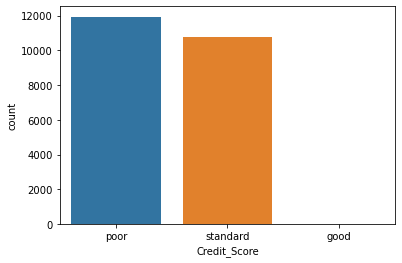

In [107]:
sb.countplot(x=pd.DataFrame(rf_y_pred)[0], )
plt.xticks([0,1,2],['poor','standard','good'])
plt.xlabel('Credit_Score')

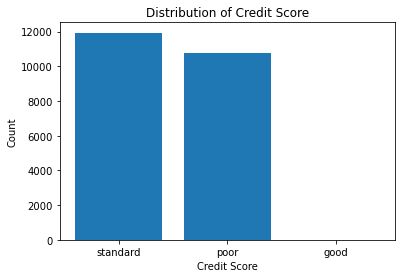

In [108]:
import matplotlib.pyplot as plt

# count the number of predictions that are good (1) and bad (0)
counts = pd.DataFrame(rf_y_pred, columns=['Credit_Score'])['Credit_Score'].value_counts()


# plot the counts as a bar chart
plt.bar(x=[0,1,2], height=counts.values)
plt.xticks([1,0,2], ['poor','standard','good'])
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Score')
plt.show()

In [93]:

X_test = drop_test.drop('Credit_Score', axis=1)
# Convert categorical features to one-hot encoded features
X_test = pd.get_dummies(X_test)
y_test = drop_test['Credit_Score']

In [94]:
y_pred = rf.predict(X_test)


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11939
           2       1.00      1.00      1.00     10763
           3       1.00      1.00      1.00         1

    accuracy                           1.00     22703
   macro avg       1.00      1.00      1.00     22703
weighted avg       1.00      1.00      1.00     22703



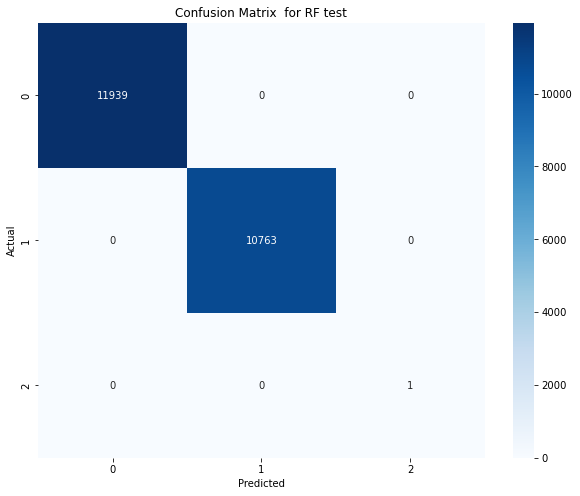

In [100]:
rf_y_pred = rf.predict(X_test)
# Print classification report
print(classification_report(y_test, rf_y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(10,8))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix  for RF test')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()